In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

**Import The Data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Customer Reviews of Products.csv')
data.head(10)

,ID,Tweet_Posted_Time (UTC),Tweet
0,1,01-05-18 0:47,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,01-05-18 4:11,Finally a transparant silicon case ^^ Thanks t...
2,3,01-05-18 4:19,We love this! Would you go? #talk #makememorie...
3,4,01-05-18 5:10,I'm wired I know I'm George I was made that wa...
4,5,01-05-18 5:29,What amazing service! Apple won't even talk to...
5,6,01-05-18 8:22,iPhone software update fucked up my phone big ...
6,7,01-05-18 8:42,Happy for us .. #instapic #instadaily #us #son...
7,8,01-05-18 9:32,New Type C charger cable #UK http://www.ebay.c...
8,9,01-05-18 9:41,Bout to go shopping again listening to music #...
9,10,01-05-18 10:00,Photo: #fun #selfie #pool #water #sony #camera...


In [ ]:
data.shape

(25000, 3)

In [ ]:
data.dtypes

ID                          int64
Tweet_Posted_Time (UTC)    object
Tweet                      object
dtype: object

In [ ]:
data.drop(['ID','Tweet_Posted_Time (UTC)'], axis='columns',inplace=True)
data.head(10)

,Tweet
0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,Finally a transparant silicon case ^^ Thanks t...
2,We love this! Would you go? #talk #makememorie...
3,I'm wired I know I'm George I was made that wa...
4,What amazing service! Apple won't even talk to...
5,iPhone software update fucked up my phone big ...
6,Happy for us .. #instapic #instadaily #us #son...
7,New Type C charger cable #UK http://www.ebay.c...
8,Bout to go shopping again listening to music #...
9,Photo: #fun #selfie #pool #water #sony #camera...


**Preprocessing**

In [ ]:
#Checking for duplicate values

data.duplicated().sum()

5307

In [ ]:
#Dropping duplicate values

data.drop_duplicates(inplace = True)
data.shape

(19693, 1)

In [ ]:
#Checking for missing values

data.isnull().sum()

Tweet     1
dtype: int64

In [ ]:
#Removing missing values

data1 = data.dropna()
data1.shape

(19692, 1)

In [ ]:
#installing emoji & emoji_translate package of python 

!pip install emoji

!pip install emoji_translate

     |████████████████████████████████| 133kB 25.3MB/s 
     |████████████████████████████████| 430kB 31.2MB/s 


In [ ]:
import re
import string
import nltk
import emoji
from emoji_translate.emoji_translate import Translator
from emoji import emoji_lis
from collections import Counter
from bs4 import BeautifulSoup
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def get_emojis(sentence):
  sentence = " ".join(sentence)
  words = word_tokenize(sentence)
  emojis = [e for e in words if e in emoji.UNICODE_EMOJI['en']]
  return emojis

In [ ]:
emojis_bow = get_emojis(data1['Tweet '])
emoji_count = (Counter(emojis_bow).items())
emoji_frame = pd.DataFrame(emoji_count, columns=['emoji','count'])
plt.figure(figsize=(20,10))
emoji_frame.head(10).sort_values(by='count',ascending=False)

,emoji,count
2,📱,17
4,🤔,12
7,💗,8
0,😘,4
3,😞,3
5,🙌,3
6,🤗,3
1,😭,2
8,🙂,2
9,📺,1


<Figure size 1440x720 with 0 Axes>

In [ ]:
#creating method to replace emojis by English text

emo = Translator(exact_match_only=False, randomize=True)
replace_emojis = lambda x: emo.demojify(str(x))

In [ ]:
data1['Tweet '] = data1['Tweet '].apply(replace_emojis)

In [ ]:
#Replacing Words Matching Regular Expressions 

replacement_patterns = [
	(r'won\'t', 'will not'),
	(r'can\'t', 'cannot'),
	(r'i\'m', 'i am'),
  (r'I\'m', 'I am'),
	(r'ain\'t', 'is not'),
	(r'(\w+)\'ll', '\g<1> will'),
	(r'(\w+)n\'t', '\g<1> not'),
	(r'(\w+)\'ve', '\g<1> have'),
	(r'(\w+)\'s', '\g<1> is'),
	(r'(\w+)\'re', '\g<1> are'),
	(r'(\w+)\'d', '\g<1> would'),
]

class RegexpReplacer(object):

	def __init__(self, patterns=replacement_patterns):
		self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
	
	def replace(self, text):
		s = text
		
		for (pattern, repl) in self.patterns:
			s = re.sub(pattern, repl, s)
		
		return s

In [ ]:
replacing = RegexpReplacer()
replacing.replace("I should've done that thing I didn't do")

'I should have done that thing I did not do'

In [ ]:
def cleaned_data(Tweet ):
                                                                            #replaces emoticon with meaningful data
  tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' Smile ',Tweet )        # Smile -- :), : ), :-), (:, ( :, (-:, :')
  tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' Laugh ', tweet)                # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
  tweet = re.sub(r'(<3|:\*)', ' Love ', tweet)                              # Love -- <3, :*
  tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' Wink ', tweet)                    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
  tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' Sad ', tweet)              # Sad -- :-(, : (, :(, ):, )-:
  tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' Cry ', tweet)                      # Cry -- :,(, :'(, :"(

  tweet = tweet.lower()                                                     #lowercase
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                                 #convert more than 2 letter repetitions to 2 letter (funnnnny-> funny)
  tweet = re.sub(r'\d+', '', tweet)                                         #remove numbers
  tweet = BeautifulSoup(tweet).get_text()                                   #remove html tags
  tweet = re.sub(r'@[\S]+', '', tweet)                                      #remove @mentions
  tweet = re.sub(r'RT[\s]+','', tweet)                                      #remove RT
  tweet = re.sub(r'#[\s]+','', tweet)                                       #remove Hashtag
  tweet = re.sub(r'((https?://[\S]+))', ' ', tweet)                         #remove url
  tweet = tweet.translate(str.maketrans(dict.fromkeys(string.punctuation))) #remove punctuation
  result = " ".join(tweet.split())                                          #remove whitespaces                                    
  return result 

In [ ]:
test = ''' He is so :-(. There are 3 balls in this bag, and 12 in the other one. we do not need   the given questions. 
                  http://www.github.com <html>#good</html>. @arif are you #happy?'''

t = cleaned_data(test)

print("Before cleaning:",test)
print("\nAfter cleaning:",t)

Before cleaning:  He is so :-(. There are 3 balls in this bag, and 12 in the other one. we do not need   the given questions. 
                  http://www.github.com <html>#good</html>. @arif are you #happy?

After cleaning: he is so sad there are balls in this bag and in the other one we do not need the given questions good are you happy


In [ ]:
#Replacing Negations with Antonyms

from nltk.corpus import wordnet

class AntonymReplacer(object):
	def replace(self, word, pos=None):
		antonyms = set()
		for syn in wordnet.synsets(word, pos=pos):
			for lemma in syn.lemmas():
				for antonym in lemma.antonyms():
					antonyms.add(antonym.name())
		if len(antonyms) == 1:
			return antonyms.pop()
		else:
			return None

	def replace_negations(self, sent):
   
		i, l = 0, len(sent)
		words = []
		while i < l:
			word = sent[i]
			if word == 'not' and i+1 < l:
				ant = self.replace(sent[i+1])
				if ant:
					words.append(ant)
					i += 2
					continue
			words.append(word)
			i += 1
		return words

In [ ]:
#replace negations with antonyms in the tokenized sentence
	
replacer = AntonymReplacer()
replacer.replace_negations(['do', 'not', 'uglify', 'our', 'code'])

['do', 'beautify', 'our', 'code']

In [ ]:
data1['Tweet '] = data1['Tweet '].apply(replacing.replace)
#data1['Tweet '].head()

In [ ]:
data1['Tweet '] = data1['Tweet '].apply(cleaned_data)
#data1['Tweet '].head()

In [ ]:
data1['Tweet ']= data1['Tweet '].apply(word_tokenize)
#data1['Tweet '].head()

In [ ]:
data1['Tweet '] = data1['Tweet '].apply(replacer.replace_negations)
#data1['Tweet '].head()

In [ ]:
english_stopwords = stopwords.words('english')
print(english_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def remove_stop_words(words):       
    result = [i for i in words if i not in stopwords.words('english')]     
    return result
    
data1['Tweet '] = data1['Tweet '].apply(remove_stop_words)
#data1['Tweet '].head()

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(Tweet ):       
    return " ".join([lemmatizer.lemmatize(word) for word in Tweet ])
    
data1['Tweet '] = data1['Tweet '].apply(lemmatize_words)

#data1['Tweet '].head()

In [ ]:
#word frequency check

comments = " ".join(data1['Tweet '])
words = word_tokenize(comments)
bow = Counter(words)
print(bow)

Counter({'samsung': 12870, 'mobile': 10080, 'iphone': 5459, 'apple': 4231, 'phone': 3779, 'galaxy': 2328, 'new': 2245, '…': 1492, 'sony': 1178, 'android': 1083, 'like': 973, 'follow': 924, 'note': 919, 'india': 864, 'get': 815, 'life': 786, 'love': 778, 'u': 765, 'smartphone': 718, 'day': 705, '’': 690, 'ipad': 676, 'deal': 658, 'case': 649, 'smile': 626, 'buy': 581, 'one': 580, 'tech': 580, 'via': 575, 'photo': 573, 'today': 570, 'video': 560, 'news': 548, 'rt': 543, 'back': 527, 'time': 522, 'price': 520, 'app': 502, 'service': 498, 'io': 493, 'got': 473, 'device': 467, 'sad': 460, 'instagram': 456, 'check': 453, 'amp': 452, 'work': 450, 'gift': 449, 'camera': 427, 'sale': 423, 'photography': 421, 'best': 416, 'free': 407, 'cute': 402, 'laugh': 399, 'gb': 399, 'gear': 395, 'make': 392, 'gain': 392, 'store': 391, 'would': 380, 'amazon': 374, 'touchscreen': 374, 'music': 370, 'fun': 370, 'want': 369, 'year': 368, 'good': 363, 'update': 362, 'plus': 344, 'gadget': 333, 'visit': 329, 're

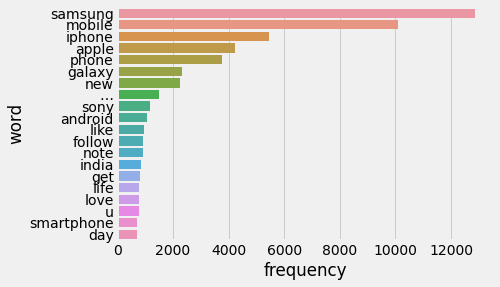

In [ ]:
data = pd.DataFrame(bow.items(), columns=['word','frequency']).sort_values(by='frequency',ascending=False)
data = data.head(20)
sns.barplot(x='frequency',y='word',data=data)
plt.show()

In [ ]:
#Create WordCloud

sentences = data1['Tweet '].tolist()

print(sentences)

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone', 'finally transparant silicon case thanks uncle smile yay sony xperia sonyexperias…', 'love would go talk makememories unplug relax iphone smartphone wifi connect', 'wired know george made way wink iphone cute daventry home', 'amazing service apple even talk question unless pay stupid support', 'iphone software update fucked phone big time stupid iphones', 'happy u instapic instadaily u sony xperia xperiaz', 'new type c charger cable uk … bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pictwittercompjiwqwtc', 'bout go shopping listening music iphone justme music likeforlike followforfollow…', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor', 'hey apple make new ipod dont make new color inch thinner make crash every five fuckin minite', 'ha light machinery need really d

In [ ]:
len(sentences)

19692

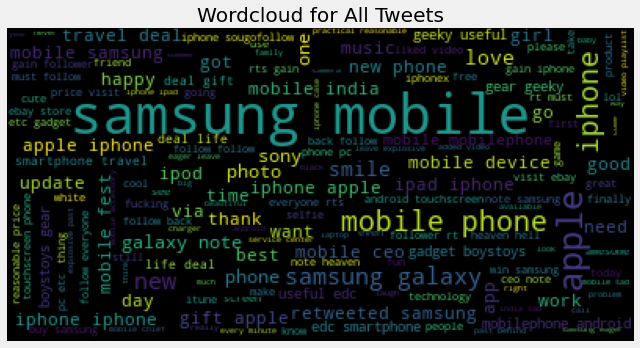

In [ ]:
sentences_as_one_string = " ".join(sentences)

from wordcloud import WordCloud
plt.figure(figsize=(10,10))
plt.title("Wordcloud for All Tweets")
plt.imshow(WordCloud().generate(sentences_as_one_string))
plt.axis("off")
plt.show()

In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(str(x)).sentiment.polarity
sub = lambda x: TextBlob(str(x)).sentiment.subjectivity

data1['polarity'] = data1['Tweet '].apply(pol)
data1['subjectivity'] = data1['Tweet '].apply(sub)
data1.head()

,Tweet,polarity,subjectivity
0,fingerprint pregnancy test android apps beauti...,0.675000,1.000000
1,finally transparant silicon case thanks uncle ...,0.166667,0.433333
2,love would go talk makememories unplug relax i...,0.500000,0.600000
3,wired know george made way wink iphone cute da...,0.500000,1.000000
4,amazing service apple even talk question unles...,-0.100000,0.950000


In [ ]:
data1.shape

(19692, 3)

In [ ]:
def opinion(polarity):
        if (polarity >= -1 and polarity < -0.5):
            return "Strongly Negative"
        elif (polarity >= -0.5 and polarity < 0):
            return "Weakly Negative"
        elif (polarity == 0):
            return "Neutral"
        elif (polarity > 0 and polarity <= 0.5):
            return "Weakly Positive"
        elif (polarity > 0.5 and polarity <= 1):
            return "Strongly Positive"

In [ ]:
data1['opinion'] = data1['polarity'].apply(opinion)
data1.head()

,Tweet,polarity,subjectivity,opinion
0,fingerprint pregnancy test android apps beauti...,0.675000,1.000000,Strongly Positive
1,finally transparant silicon case thanks uncle ...,0.166667,0.433333,Weakly Positive
2,love would go talk makememories unplug relax i...,0.500000,0.600000,Weakly Positive
3,wired know george made way wink iphone cute da...,0.500000,1.000000,Weakly Positive
4,amazing service apple even talk question unles...,-0.100000,0.950000,Weakly Negative


In [ ]:
def trans_opinion(x):
      if x =='Strongly Negative':
        return 0
      elif x == 'Weakly Negative':
        return 1
      elif x == 'Neutral':
        return 2
      elif x == 'Weakly Positive':
        return 3
      elif x == 'Strongly Positive':
        return 4

In [ ]:
data1['label'] = data1['opinion'].apply(trans_opinion)
data1.head()

,Tweet,polarity,subjectivity,opinion,label
0,fingerprint pregnancy test android apps beauti...,0.675000,1.000000,Strongly Positive,4
1,finally transparant silicon case thanks uncle ...,0.166667,0.433333,Weakly Positive,3
2,love would go talk makememories unplug relax i...,0.500000,0.600000,Weakly Positive,3
3,wired know george made way wink iphone cute da...,0.500000,1.000000,Weakly Positive,3
4,amazing service apple even talk question unles...,-0.100000,0.950000,Weakly Negative,1


In [ ]:
data1.opinion.value_counts()

Neutral              7362
Weakly Positive      7312
Weakly Negative      2795
Strongly Positive    1835
Strongly Negative     388
Name: opinion, dtype: int64

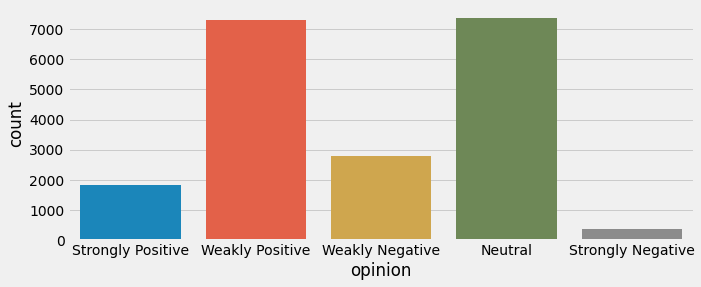

In [ ]:
plt.figure(figsize=(10,4))

sns.countplot(x=data1['opinion'], label = 'Count')
plt.show()

**Remove Unnecessary Columns**

In [ ]:
data1.drop(['polarity',	'subjectivity', 'opinion'], axis='columns',inplace=True)
data1.head()

,Tweet,label
0,fingerprint pregnancy test android apps beauti...,4
1,finally transparant silicon case thanks uncle ...,3
2,love would go talk makememories unplug relax i...,3
3,wired know george made way wink iphone cute da...,3
4,amazing service apple even talk question unles...,1


In [ ]:
weakly_negative = data1[data1['label']==1]

weakly_negative.head()

,Tweet,label
4,amazing service apple even talk question unles...,1
5,iphone software update fucked phone big time s...,1
12,contemplating giving iphone bandwagon simply c...,1
14,battery painful charge overnight lunchtime bat...,1
21,excuse waiter seems pie soup wife bake apple p...,1


In [ ]:
weakly_positive = data1[data1['label']==3]

weakly_positive.head()

,Tweet,label
1,finally transparant silicon case thanks uncle ...,3
2,love would go talk makememories unplug relax i...,3
3,wired know george made way wink iphone cute da...,3
7,new type c charger cable uk … bay amazon etsy ...,3
9,photo fun selfie pool water sony camera picoft...,3


**Vectorization**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=4000)  
tweets_processed = cv.fit_transform(data1['Tweet ']).toarray()

In [ ]:
tweets_processed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tweets_processed.shape

(19692, 4000)

In [ ]:
print(cv.get_feature_names())

['aa', 'aapl', 'ab', 'able', 'absolute', 'absolutely', 'abt', 'abuja', 'abujacity', 'abujafct', 'abujapeople', 'abujaphones', 'ac', 'accept', 'access', 'accessary', 'accessoires', 'accessory', 'accident', 'accidental', 'accidentally', 'according', 'account', 'ace', 'across', 'act', 'acting', 'action', 'active', 'actor', 'actress', 'actual', 'actually', 'ad', 'adam', 'adapter', 'adaptor', 'add', 'added', 'addict', 'addicted', 'addiction', 'adding', 'addition', 'additional', 'address', 'adhesion', 'adidas', 'admit', 'adobe', 'adorable', 'adult', 'advance', 'advanced', 'advantage', 'adventure', 'advert', 'advertisement', 'advertising', 'advice', 'advise', 'adwhite', 'af', 'afford', 'affordable', 'afraid', 'africa', 'aftergymwear', 'afternoon', 'agarwal', 'age', 'agency', 'ago', 'agra', 'agree', 'ah', 'ahead', 'ahh', 'ahmedabad', 'ai', 'aid', 'air', 'airplane', 'airpods', 'airport', 'airtel', 'aka', 'akg', 'al', 'album', 'alcohol', 'alert', 'ali', 'aliusaexpress', 'alive', 'allnew', 'allow

In [ ]:
X = pd.DataFrame(tweets_processed)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3960,3961,3962,3963,3964,3965,3966,3967,3968,3969,3970,3971,3972,3973,3974,3975,3976,3977,3978,3979,3980,3981,3982,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = data1['label']

**Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print("Shape of Train Data =", X_train.shape)
print("Shape of Test Data =", X_test.shape)

Shape of Train Data = (15753, 4000)
Shape of Test Data = (3939, 4000)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

**Train Model**

In [ ]:
clf1 = LinearSVC()
clf1.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

**Test Model**

In [ ]:
y_predict = clf1.predict(X_test)

In [ ]:
ds=pd.DataFrame({"Actual_value":y_test,"Predicted_value":y_predict})
print('Prediction by SVM on Test data set\n')
ds.head()

Prediction by SVM on Test data set



,Actual_value,Predicted_value
3194,3,3
21853,2,2
17917,4,3
6584,3,3
8237,3,3


In [ ]:
svm_pred_proba = clf1._predict_proba_lr(X_test)
svm_pred_proba

array([[0.01246411, 0.08448465, 0.00860125, 0.80596009, 0.08848989],
       [0.08544827, 0.17152428, 0.51338538, 0.05604624, 0.17359584],
       [0.0565241 , 0.01376344, 0.02397358, 0.47733766, 0.42840122],
       ...,
       [0.02653947, 0.47784187, 0.13783052, 0.17148053, 0.18630762],
       [0.01868939, 0.30110767, 0.00982213, 0.65933014, 0.01105068],
       [0.03940363, 0.03690057, 0.08478787, 0.32866805, 0.51023988]])

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

Accuracy: 0.88
Auc: 0.96
Detail:
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        74
           1       0.84      0.76      0.80       585
           2       0.91      0.96      0.93      1431
           3       0.89      0.88      0.88      1466
           4       0.82      0.81      0.81       383

    accuracy                           0.88      3939
   macro avg       0.81      0.80      0.80      3939
weighted avg       0.88      0.88      0.88      3939



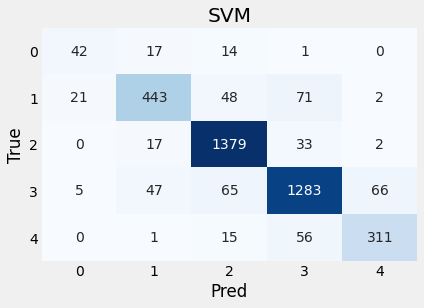

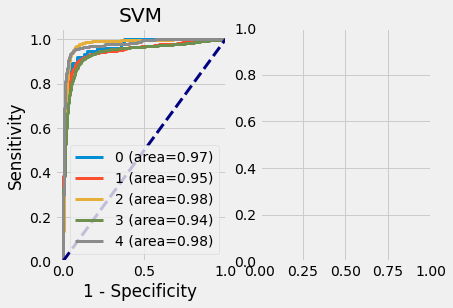

In [ ]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, y_predict)
auc = metrics.roc_auc_score(y_test, svm_pred_proba, 
                            multi_class="ovr")
accuracy1 = round(accuracy,2)
auc1 = round(auc,2)
print("Accuracy:", accuracy1)
print("Auc:", auc1)
print("Detail:")
print(metrics.classification_report(y_test, y_predict))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="SVM")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           svm_pred_proba[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='1 - Specificity', 
          ylabel="Sensitivity", 
          title="SVM")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
plt.show()

In [ ]:
clf2 = MultinomialNB()
clf2.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_predict = clf2.predict(X_test)

In [ ]:
ds=pd.DataFrame({"Actual_value":y_test,"Predicted_value":y_predict})
print('Prediction by MultinomialNB on Test data set\n')
ds.head()

Prediction by MultinomialNB on Test data set



,Actual_value,Predicted_value
3194,3,3
21853,2,2
17917,4,3
6584,3,0
8237,3,3


In [ ]:
nb_pred_proba = clf2.predict_proba(X_test)
nb_pred_proba

array([[2.15265922e-06, 6.59499673e-04, 3.87144458e-05, 9.53064138e-01,
        4.62354953e-02],
       [3.57711077e-05, 2.51372794e-03, 9.90607907e-01, 3.31649859e-03,
        3.52609525e-03],
       [8.83641564e-07, 3.71981330e-04, 4.57186947e-04, 9.69881148e-01,
        2.92887998e-02],
       ...,
       [1.23878925e-03, 8.08007243e-01, 4.45756803e-02, 1.43259538e-01,
        2.91874979e-03],
       [1.21076535e-02, 9.39889576e-01, 2.74166979e-05, 4.79667773e-02,
        8.57617280e-06],
       [1.55906919e-08, 1.50213435e-03, 2.59343001e-04, 8.88429828e-01,
        1.09808679e-01]])

Accuracy: 0.72
Auc: 0.91
Detail:
              precision    recall  f1-score   support

           0       0.29      0.26      0.27        74
           1       0.59      0.76      0.66       585
           2       0.87      0.73      0.79      1431
           3       0.73      0.77      0.75      1466
           4       0.55      0.56      0.55       383

    accuracy                           0.72      3939
   macro avg       0.61      0.61      0.61      3939
weighted avg       0.73      0.72      0.72      3939



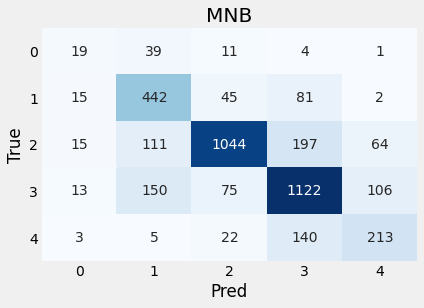

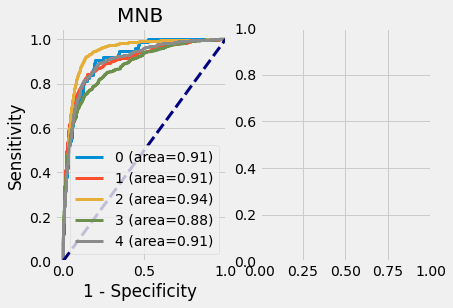

In [ ]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, y_predict)
auc = metrics.roc_auc_score(y_test, nb_pred_proba, 
                            multi_class="ovr")
accuracy2 = round(accuracy,2)
auc2 = round(auc,2)
print("Accuracy:", accuracy2)
print("Auc:", auc2)
print("Detail:")
print(metrics.classification_report(y_test, y_predict))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="MNB")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           nb_pred_proba[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='1 - Specificity', 
          ylabel="Sensitivity", 
          title="MNB")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
plt.show()

In [ ]:
clf3 = LogisticRegression(solver='lbfgs', max_iter=400)
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict= clf3.predict(X_test)

In [ ]:
ds=pd.DataFrame({"Actual_value":y_test,"Predicted_value":y_predict})
print('Prediction by LogisticRegression on Test data set\n')
ds.head()

Prediction by LogisticRegression on Test data set



,Actual_value,Predicted_value
3194,3,3
21853,2,2
17917,4,3
6584,3,3
8237,3,3


In [ ]:
lr_pred_proba = clf3.predict_proba(X_test)
lr_pred_proba

array([[1.22363714e-05, 6.88501114e-04, 3.02206305e-05, 9.97149693e-01,
        2.11934872e-03],
       [9.84766247e-04, 2.40569026e-02, 9.53061949e-01, 1.33263571e-02,
        8.57002486e-03],
       [1.93608716e-04, 6.53714246e-04, 7.62571858e-04, 7.45777744e-01,
        2.52612361e-01],
       ...,
       [1.92245671e-03, 1.55663855e-01, 3.51416194e-02, 6.79498086e-01,
        1.27773982e-01],
       [2.27873007e-04, 8.42981773e-02, 4.23983336e-05, 9.15302819e-01,
        1.28732150e-04],
       [2.61441292e-04, 2.79225908e-03, 1.30324792e-02, 3.19789089e-01,
        6.64124731e-01]])

Accuracy: 0.88
Auc: 0.97
Detail:
              precision    recall  f1-score   support

           0       0.62      0.41      0.49        74
           1       0.89      0.76      0.82       585
           2       0.88      0.98      0.93      1431
           3       0.90      0.88      0.89      1466
           4       0.84      0.78      0.81       383

    accuracy                           0.88      3939
   macro avg       0.83      0.76      0.79      3939
weighted avg       0.88      0.88      0.88      3939



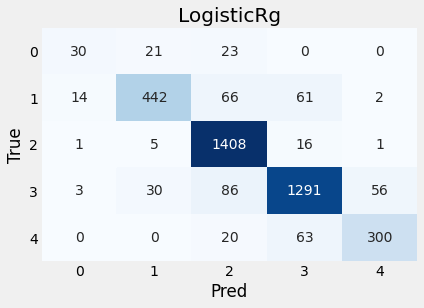

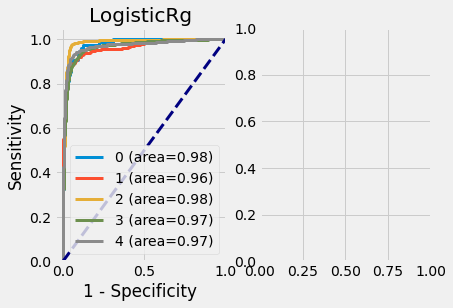

In [ ]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, y_predict)
auc = metrics.roc_auc_score(y_test, lr_pred_proba, 
                            multi_class="ovr")
accuracy3 = round(accuracy,2)
auc3 = round(auc,2)
print("Accuracy:", accuracy3)
print("Auc:", auc3)
print("Detail:")
print(metrics.classification_report(y_test, y_predict))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="LogisticRg")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           lr_pred_proba[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='1 - Specificity', 
          ylabel="Sensitivity", 
          title="LogisticRg")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
plt.show()

In [ ]:
clf4 = DecisionTreeClassifier(random_state=0)   
clf4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_predict = clf4.predict(X_test)

In [ ]:
ds=pd.DataFrame({"Actual_value":y_test,"Predicted_value":y_predict})
print('Prediction by DecisionTree on Test data set\n')
ds.head()

Prediction by DecisionTree on Test data set



,Actual_value,Predicted_value
3194,3,3
21853,2,2
17917,4,3
6584,3,3
8237,3,3


In [ ]:
dt_pred_proba = clf4.predict_proba(X_test)
dt_pred_proba

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Accuracy: 0.87
Auc: 0.88
Detail:
              precision    recall  f1-score   support

           0       0.58      0.66      0.62        74
           1       0.85      0.75      0.80       585
           2       0.94      0.96      0.95      1431
           3       0.87      0.86      0.87      1466
           4       0.73      0.79      0.76       383

    accuracy                           0.87      3939
   macro avg       0.79      0.81      0.80      3939
weighted avg       0.87      0.87      0.87      3939



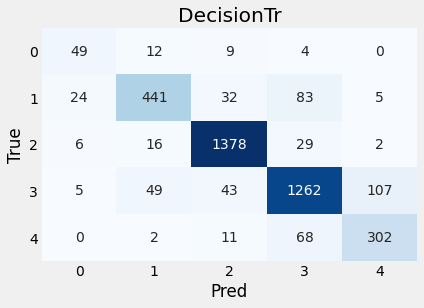

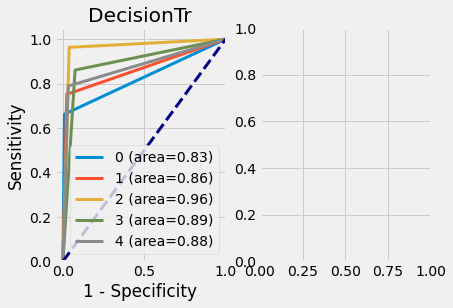

In [ ]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, y_predict)
auc = metrics.roc_auc_score(y_test, dt_pred_proba, 
                            multi_class="ovr")
accuracy4 = round(accuracy,2)
auc4 = round(auc,2)
print("Accuracy:", accuracy4)
print("Auc:", auc4)
print("Detail:")
print(metrics.classification_report(y_test, y_predict))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="DecisionTr")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           dt_pred_proba[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='1 - Specificity', 
          ylabel="Sensitivity", 
          title="DecisionTr")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
plt.show()

In [ ]:
clf5 = RandomForestClassifier()  
clf5.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict = clf5.predict(X_test)

In [ ]:
ds=pd.DataFrame({"Actual_value":y_test,"Predicted_value":y_predict})
print('Prediction by RandomForest on Test data set\n')
ds.head()

Prediction by RandomForest on Test data set



,Actual_value,Predicted_value
3194,3,3
21853,2,2
17917,4,3
6584,3,3
8237,3,3


In [ ]:
rf_pred_proba = clf5.predict_proba(X_test)
rf_pred_proba

array([[0.        , 0.        , 0.02      , 0.96      , 0.02      ],
       [0.        , 0.02387331, 0.96612669, 0.01      , 0.        ],
       [0.        , 0.02      , 0.07      , 0.74      , 0.17      ],
       ...,
       [0.        , 0.03      , 0.02      , 0.93      , 0.02      ],
       [0.        , 0.31      , 0.03      , 0.66      , 0.        ],
       [0.        , 0.        , 0.05      , 0.22      , 0.73      ]])

Accuracy: 0.87
Auc: 0.96
Detail:
              precision    recall  f1-score   support

           0       0.63      0.66      0.64        74
           1       0.92      0.69      0.78       585
           2       0.88      0.99      0.93      1431
           3       0.89      0.85      0.87      1466
           4       0.75      0.79      0.77       383

    accuracy                           0.87      3939
   macro avg       0.81      0.79      0.80      3939
weighted avg       0.87      0.87      0.86      3939



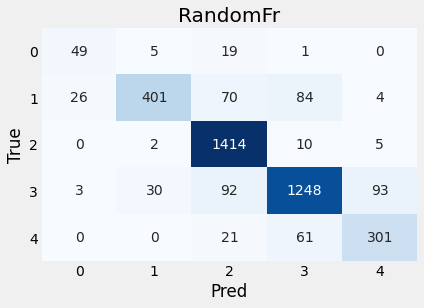

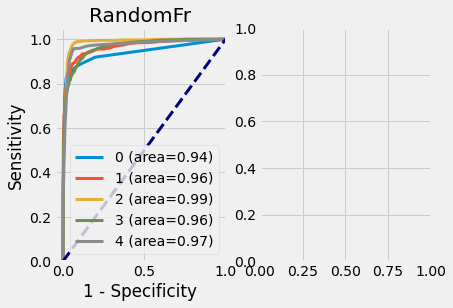

In [ ]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, y_predict)
auc = metrics.roc_auc_score(y_test, rf_pred_proba, 
                            multi_class="ovr")
accuracy5 = round(accuracy,2)
auc5 = round(auc,2)
print("Accuracy:", accuracy5)
print("Auc:", auc5)
print("Detail:")
print(metrics.classification_report(y_test, y_predict))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="RandomFr")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           rf_pred_proba[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='1 - Specificity', 
          ylabel="Sensitivity", 
          title="RandomFr")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
plt.show()

In [ ]:
print('BOW =',accuracy1,accuracy2,accuracy3,accuracy4,accuracy5)

BOW = 0.88 0.72 0.88 0.87 0.87


In [ ]:
print('BOW =',auc1,auc2,auc3,auc4,auc5)

BOW = 0.96 0.91 0.97 0.88 0.96


**Predict Random Tweet**

In [ ]:
# deemojize the emoji
#text = 'Dolard Trump always tell a lie'
#text = 'She wins the competition . now she looks like 😄 '
#text = 'Rakib failed in the final    exam. He is now 😞'
text = "I am not happy 😞, I won't die"
emoji_lis(text)

[{'emoji': '😞', 'location': 15}]

In [ ]:
tweet = replace_emojis(text)
tweet

"I am not happy disappointed, I won't die"

In [ ]:
a = replacing.replace(tweet)
b = cleaned_data(a)
c = word_tokenize(b)
d = replacer.replace_negations(c)
e = remove_stop_words(d)
f = lemmatize_words(e)
f

'unhappy disappointed be_born'

In [ ]:
vec  = cv.transform([f])

print("Random Tweet: ",text)
print("Opinion Score:",clf5.predict(vec))

Random Tweet:  I am not happy 😞, I won't die
Opinion Score: [2]
